## Display an image and extract feature using pre-trained convolutional neural network ## 

In [7]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [8]:
from PIL import Image
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms
import torchvision.models as models
import os
import math
from time import time

os.chdir(r'/Users/jeremywan/Desktop/MMTech/lab1_cbir_student')
imgpath = r'./images'

from ai_pytorch_module import *
device= torch.device("cpu")

In [9]:
#%% Load model used to extract feature
model = models.vgg16(pretrained=True)
model.classifier = model.classifier[:4] # until linear (3)before relu (4)
model.to(device)
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [10]:
pwd

'/Users/jeremywan/Desktop/MMTech/lab1_cbir_student'

In [11]:
#%% Extract the feature from pre-trained convolutional neural network CNN 

filename = '002.jpg'
start = time()
filename_ = os.path.join(imgpath, filename)
imgFeature = getCNNFeature(model, filename_,  device, showImage = False,)
end = time()
print("The feature dimension = ", imgFeature.shape)
print(" Time taken to extract feature from one image (sec) = ", end - start) # 1.3 sec

im = Image.open(filename_)
plt.figure(figsize=(8,6))
plt.imshow(im) , plt.axis('off')
titleStr = " Image {}".format(filename)
plt.title(titleStr,  fontsize=20)

# Extract the feature from colour histogram 
# Your code for getColorHist(filename)

def getColorHist(filename):
#Extract the feature from pre-trained convolutional neural network CNN <br>
    
    im = np.array( Image.open(filename) )
    
    # create the histogram plot, with three lines, one for
    # each color
    colors = ("r", "g", "b")
    channel_ids = (0, 1, 2)
    plt.figure()
    plt.xlim([0, 256])
    
    histL = []
    for channel_id, c in zip(channel_ids, colors):
        histogram, bin_edges = np.histogram(
            im[:, :, channel_id], bins=256, range=(0, 256)
        )
        
        plt.plot(bin_edges[0:-1], histogram, color=c)
        histogram_n = histogram / np.sum(histogram)
        histL.extend(histogram_n)
        
    hist_feat = np.array(histL)  # hist is the histogram vector that represent the image im
    
    plt.xlabel("Color value")
    plt.ylabel("Pixels")
    plt.title(filename)
    plt.show()
    
    return hist_feat

The feature dimension =  (1, 4096)
 Time taken to extract feature from one image (sec) =  0.674015998840332


### Question 3:
<br>
(a) Compute dissimilarity distance (euclidian) with feature from colour histogram <br>
Extract the feature from image '001.jpg' , '022.jpg' and '400.jpg'. Compute the euclidian distance between the two feature vector.
Compute the euclidian distance between the two feature vector from '001.jpg' , '022.jpg'. Then Compute the euclidian distance between the two feature vector from '001.jpg' , '400.jpg'.
<br><br>
(b) Compute dissimilarity distance (euclidian) with feature from pre-trained convolutional neural network CNN <br>
Extract the feature from image '001.jpg' , '022.jpg' and '400.jpg'. Compute the euclidian distance between the two feature vector.
Compute the euclidian distance between the two feature vector from '001.jpg' , '022.jpg'. Then Compute the euclidian distance between the two feature vector from '001.jpg' , '400.jpg'.

./images/001.jpg
./images/022.jpg
./images/400.jpg


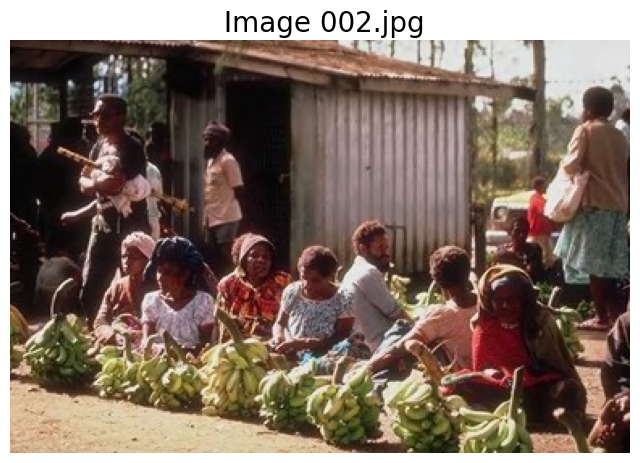

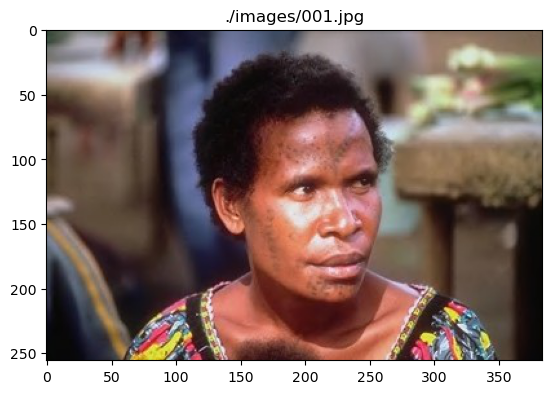

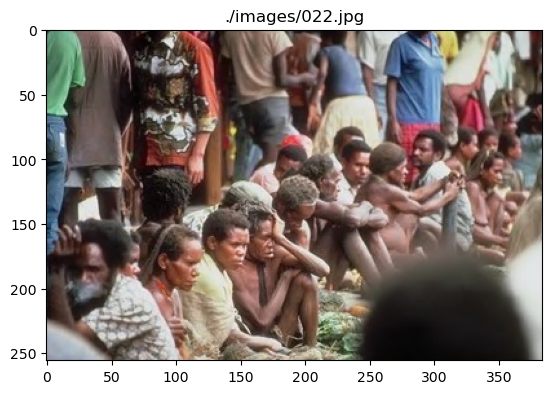

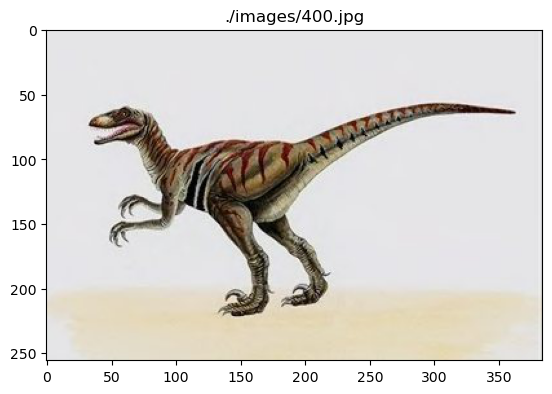

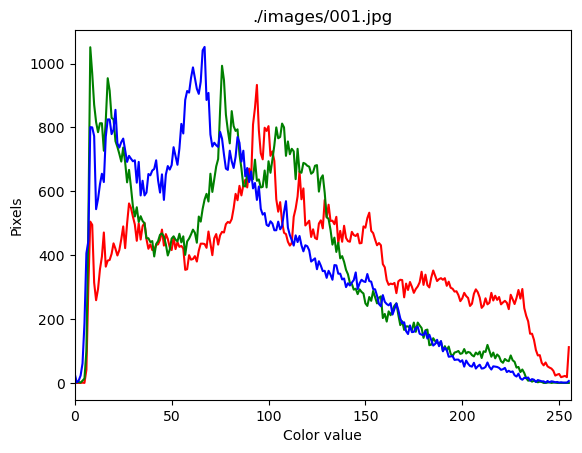

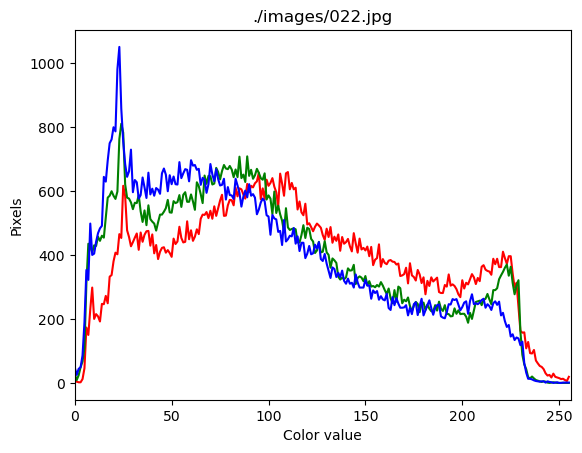

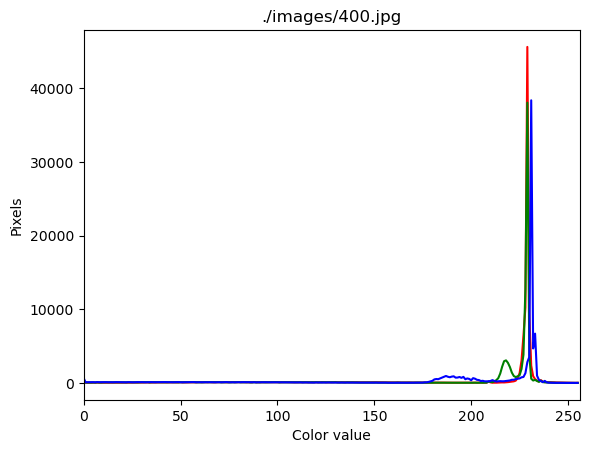

With color hist, image 1 vs image 22 , distance =  0.0345468839243469
With color hist, image 1 vs image 400 , distance =  0.7658398822987645
With cnn feature, image 1 vs image 22 , distance =  102.75528
With cnn feature, image 1 vs image 400 , distance =  133.08359


In [12]:
# Answer: Insert your code in this cell

#%% Get color histogram feature
for f in ['001.jpg', '022.jpg', '400.jpg' ] :
    filename = os.path.join(imgpath, f)
    img = Image.open(filename)
    plt.figure()
    plt.imshow(img)
    plt.title(filename)
    print(filename)


imgpath = r'./images'
feat_hists = []
i=0
for f in  ['001.jpg', '022.jpg', '400.jpg' ]  :
    filename = os.path.join(imgpath, f)
    feat = getColorHist(filename)
    feat_hists.append(feat)

#%% Comparing with color histogram
# '001.jpg' vs '022.jpg'
# your code
h1 = feat_hists[0] #001
h2 = feat_hists[1] #022
h3 = feat_hists[2] #400


# printing Euclidean distance
#h_dist1_vs_22 = np.linalg.norm(h1-h2)
h_dist1_vs_22 = np.linalg.norm(h1-h2)
print("With color hist, image 1 vs image 22 , distance = ", h_dist1_vs_22) 

# '001.jpg' , '400.jpg'.
# your code
# printing Euclidean distance
h_dist1_vs_400 = np.linalg.norm(h1-h3)
print("With color hist, image 1 vs image 400 , distance = ", h_dist1_vs_400) 


#%% Get CNN feature 
feat_cnns = []
i=0
for f in  ['001.jpg', '022.jpg', '400.jpg' ]  :
    filename = os.path.join(imgpath, f)
    feat = getCNNFeature(model, filename,  device, showImage = False)
    feat_cnns.append(feat)
    
#%% Comparing with CNN feature
# '001.jpg' vs '022.jpg'
# your code
c1 = feat_cnns[0]
c2 = feat_cnns[1]
c3 = feat_cnns[2]


# printing Euclidean distance
cnns_dist1_vs_22 = np.linalg.norm(c1-c2)
print("With cnn feature, image 1 vs image 22 , distance = ", cnns_dist1_vs_22) # 

# '001.jpg' , '400.jpg'.
# your code
# printing Euclidean distance
cnns_dist1_vs_400 = np.linalg.norm(c1-c3)
print("With cnn feature, image 1 vs image 400 , distance = ", cnns_dist1_vs_400) # 
    

# Question 4:

Explain your conclusion on the pairwise similarity between the three images '001.jpg' , '022.jpg' and '400.jpg' . Comment on the semantic similarity between the three images and the euclidian distance among their feature vectors. Compare colour histogram and CNN feature.

Your answer






The smaller the euclidean distance, the more similarity between images. By comparing the colour histogram and CNN feature, the euclidean distance among their feature vector between '001.jpg' and '022.jpg' are smaller, however, between '001.jpg' and '400.jpg' are bigger. Hence, the similarity between images '001.jpg' and '022.jpg' are more similar, meanwhile, '001.jpg' and '400jpg' are less similar. 